In [1]:
import geopandas
import geoplot

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
world = geopandas.read_file(
    geopandas.datasets.get_path('naturalearth_lowres')
)

<AxesSubplot:>

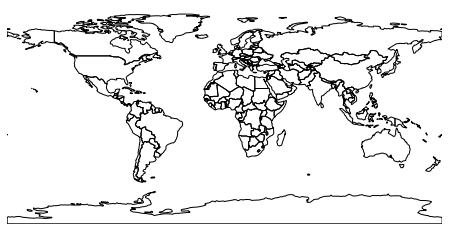

In [5]:
geoplot.polyplot(world, figsize=(8, 4))

In [6]:
world.sort_values(by=['name'])
world['name'] = world['name'].str.upper()

In [7]:
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,FIJI,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,TANZANIA,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. SAHARA,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,CANADA,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,UNITED STATES OF AMERICA,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,SERBIA,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,MONTENEGRO,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,KOSOVO,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,TRINIDAD AND TOBAGO,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [8]:
data2014 = pd.read_csv("data/2014.csv")
data2014

,Country,Total,Solid Fuel,Liquid Fuel,Gas Fuel,Cement,Gas Flaring,Per Capita,Bunker fuels (Not in Total)
0,AFGHANISTAN,2675,1194,1393,74,14,0,0.08,9
1,ALBANIA,1559,191,1053,16,299,0,0.54,23
2,ALGERIA,39651,149,14422,20151,2856,2073,1.02,581
3,ANDORRA,126,0,126,0,0,0,1.74,0
4,ANGOLA,9480,0,5310,158,340,3672,0.39,509
...,...,...,...,...,...,...,...,...,...
215,VIET NAM,45517,19246,12694,5349,8229,0,0.49,761
216,WALLIS AND FUTUNA ISLANDS,6,0,6,0,0,0,0.44,1
217,YEMEN,6190,137,5090,581,381,0,0.24,153
218,ZAMBIA,1228,132,797,0,299,0,0.08,33


In [9]:
totalEmissions = data2014[['Country','Total']]
totalEmissions

,Country,Total
0,AFGHANISTAN,2675
1,ALBANIA,1559
2,ALGERIA,39651
3,ANDORRA,126
4,ANGOLA,9480
...,...,...
215,VIET NAM,45517
216,WALLIS AND FUTUNA ISLANDS,6
217,YEMEN,6190
218,ZAMBIA,1228


In [10]:
emissionWorld = pd.merge(world, totalEmissions, how='inner', left_on='name', right_on='Country')
# Some data is lost with this merge method. 
# Would be preferable to merge on country code if its standard.
emissionWorld

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Country,Total
0,920938,Oceania,FIJI,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",FIJI,319
1,35623680,North America,CANADA,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",CANADA,146494
2,326625791,North America,UNITED STATES OF AMERICA,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",UNITED STATES OF AMERICA,1432855
3,18556698,Asia,KAZAKHSTAN,KAZ,460700.0,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",KAZAKHSTAN,67716
4,29748859,Asia,UZBEKISTAN,UZB,202300.0,"POLYGON ((55.96819 41.30864, 55.92892 44.99586...",UZBEKISTAN,28692
...,...,...,...,...,...,...,...,...
133,11901484,Africa,RWANDA,RWA,21970.0,"POLYGON ((30.41910 -1.13466, 30.81613 -1.69891...",RWANDA,229
134,2103721,Europe,MACEDONIA,MKD,29520.0,"POLYGON ((22.38053 42.32026, 22.88137 41.99930...",MACEDONIA,2048
135,7111024,Europe,SERBIA,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",SERBIA,10272
136,642550,Europe,MONTENEGRO,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",MONTENEGRO,603


In [11]:
import mapclassify as mc

# This sets the custom scheme for the map below.
bins = [1000, 10000, 50000, 100000, 500000, 1000000, 10000000]
scheme = mc.UserDefined(emissionWorld['Total'], bins)

<AxesSubplot:>

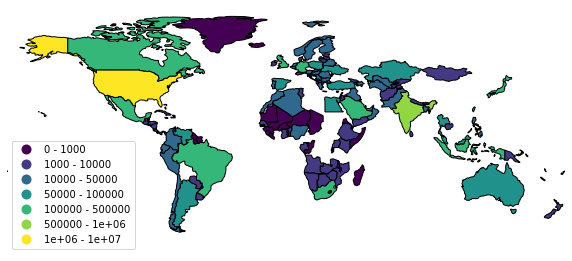

In [12]:
geoplot.choropleth(
    emissionWorld, hue='Total', figsize=(10, 5), scheme=scheme, legend=True
)
# This shows that we need to define a custom scheme to categorise output.
# Some countries (e.g. the US) are massive outliers and cause a 
# continuous scale to prove unclear.
